In [20]:
### 오디오 진폭 및 재생 시간

import librosa

# y: 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
# Sampling rate: 1초당 샘플의 개수, 단위 Hz 또는 kHz
    
y, sr = librosa.load('Data/sample_voice/1649495893251.wav')
y, _ = librosa.effects.trim(y)

print('Sampling rate (Hz): %d' % sr)
print('Audio length (secconds): %.2f' % (len(y) / sr))

Sampling rate (Hz): 22050
Audio length (secconds): 30.63


In [21]:
### 오디오 재생
import IPython.display as ipd


ipd.Audio(y, rate=sr)

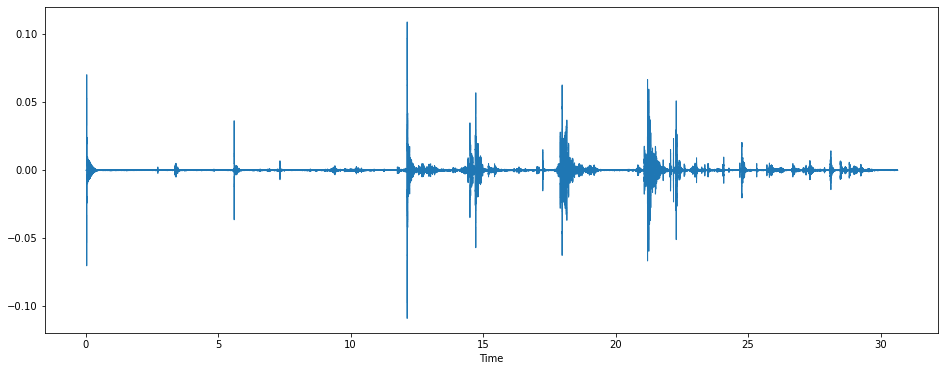

In [22]:
### 2D 음파 그래프
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16, 6))
# libsora에서 0.8.1에서 사용되지 않았던 waveplot은 0.9에서 삭제되었습니다.
# librosa.display.waveplot(y=y, sr=sr)
librosa.display.waveshow(y, sr=sr)
plt.show()

(1025, 1320)


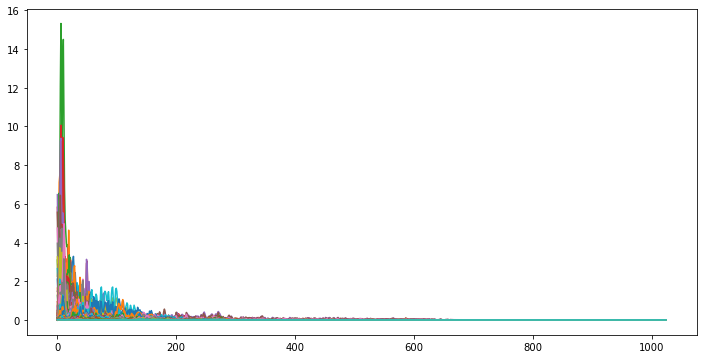

In [23]:
### 푸리에 변환(Fourier Transform)
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))

print(D.shape)

plt.figure(figsize=(12, 6))
plt.plot(D)
plt.show()


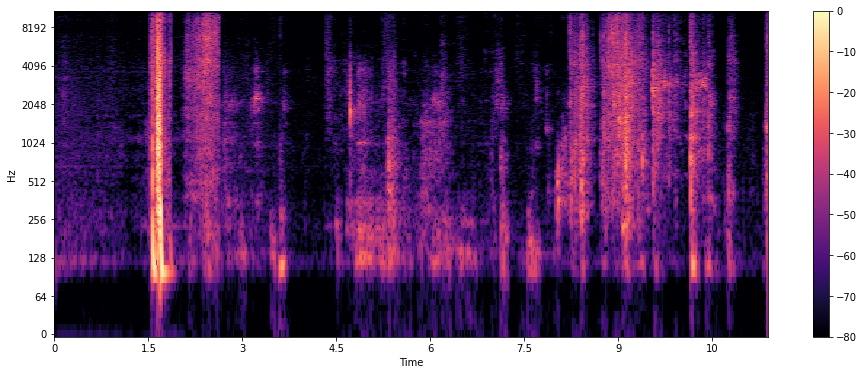

In [14]:
### 스펙트로그램(Spectogram)
DB = librosa.amplitude_to_db(D, ref=np.max) #amplitude(진폭) -> DB(데시벨)로 바꿔라

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

C:\Users\nogo0\AppData\Local\Temp/ipykernel_16028/1994757713.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.1382652  0.14683409 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr)


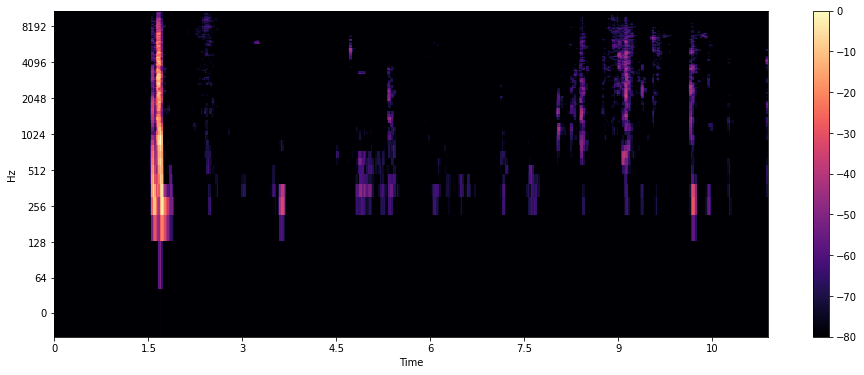

In [15]:
### 멜스펙트로그램(Mel Spectogram)
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

In [16]:
### 오디오 템포
tempo , _ = librosa.beat.beat_track(y,sr=sr)     
print(tempo)

99.38401442307692


C:\Users\nogo0\AppData\Local\Temp/ipykernel_16028/2629740473.py:2: FutureWarning: Pass y=[0.         0.         0.         ... 0.1382652  0.14683409 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo , _ = librosa.beat.beat_track(y,sr=sr)
